# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1

Use the Monte Carlo NVT code we have provided to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$, step: $\delta = 0.11$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$, step: $\delta = 0.2$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$, step: $\delta = 2.5$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

**Instructions:**

To perform the NVT Monte Carlo simulation run:

`./MonteCarlo_NVT/MonteCarlo_NVT.exe input_file`

To run a full simulation of the three phases use `all_phases_NVT.sh`.

The exercise also requires to perform an NVE simulation, in this case use `all_phases_NVE.sh`.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math

In [86]:
# Autocorrelation function
def covariance(x, time):
    mean = np.mean(x)
    cov = 0
    for i in range(len(x) - time):
        cov += (x[i]-mean)*(x[i+time]-mean)
        
    return cov/len(x)

def autocorr(x, time):
    return covariance(x, time)/covariance(x,0)

def exp_ac(x, tau):
    return np.exp(-x/tau)

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)
    
def prog_sums(n_block, array, array_squared):
    """ Return progresive sums with statistical uncertainties evaluated with data-blocking
    Par:
    n_blocks:
        Number of blocks
    array:
        Array
    array_squared:
        Array Squared
        
    Returns:
    sum_prog, err_prog
    """
    sum_prog = np.zeros(n_block)
    su2_prog = np.zeros(n_block)
    err_prog = np.zeros(n_block)
    for i in range(n_block):
        for j in range(i+1):
            sum_prog[i] += array[j] # SUM_{j=0,i} r_j
            su2_prog[i] += array_squared[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    return sum_prog, err_prog

In [55]:
gas_epot = np.loadtxt("MonteCarlo_NVT/outputs/gas/output.inst.epot.0")
gas_pres = np.loadtxt("MonteCarlo_NVT/outputs/gas/output.inst.pres.0")
liq_epot = np.loadtxt("MonteCarlo_NVT/outputs/liquid/output.inst.epot.0")
liq_pres = np.loadtxt("MonteCarlo_NVT/outputs/liquid/output.inst.pres.0")
sol_epot = np.loadtxt("MonteCarlo_NVT/outputs/solid/output.inst.epot.0")
sol_pres = np.loadtxt("MonteCarlo_NVT/outputs/solid/output.inst.pres.0")

- **Estimate of the number of equilibration steps:**

In [50]:
# Loading equilibration samples
gas_eq_epot = np.loadtxt("MonteCarlo_NVT/outputs/gas/output.inst.eq.epot.0")
gas_eq_pres = np.loadtxt("MonteCarlo_NVT/outputs/gas/output.inst.eq.pres.0")
liq_eq_epot = np.loadtxt("MonteCarlo_NVT/outputs/liquid/output.inst.eq.epot.0")
liq_eq_pres = np.loadtxt("MonteCarlo_NVT/outputs/liquid/output.inst.eq.pres.0")
sol_eq_epot = np.loadtxt("MonteCarlo_NVT/outputs/solid/output.inst.eq.epot.0")
sol_eq_pres = np.loadtxt("MonteCarlo_NVT/outputs/solid/output.inst.eq.pres.0")

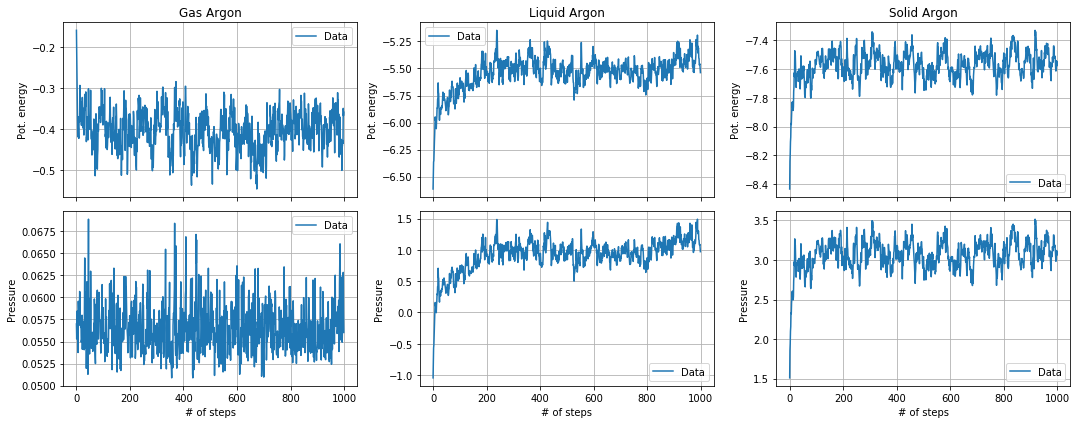

In [51]:
files = [[gas_eq_epot, liq_eq_epot, sol_eq_epot,], [gas_eq_pres, liq_eq_pres, sol_eq_pres]]
titles = ["Gas Argon", "Liquid Argon", "Solid Argon"]
obs = ["Pot. energy", "Pressure"]
fig, ax = plt.subplots(2,3, figsize=(15,6), sharex = True)
for i in range(len(obs)):
    for j in range(len(titles)):
        ax[i,j].plot(files[i][j], label='Data')
        ax[i,j].set_ylabel(obs[i])
        ax[0,j].set_title(titles[j])
        ax[1,j].set_xlabel("# of steps")
        ax[i,j].grid(True)
        ax[i,j].legend()
fig.tight_layout()

Setting the number of equilibration steps to 500 is more than enough to ensure the stabilization of the observables.

- **Autocorrelation functions:**

In [75]:
gas_ep = []      
gas_pr = []   
liq_ep = []
liq_pr = []
sol_ep = []
sol_pr = []
for time in range(400):
    gas_ep.append(autocorr(gas_epot[:4000], time))
    gas_pr.append(autocorr(gas_pres[:4000], time))
    liq_ep.append(autocorr(liq_epot[:4000], time))
    liq_pr.append(autocorr(liq_pres[:4000], time))
    sol_ep.append(autocorr(sol_epot[:4000], time))
    sol_pr.append(autocorr(sol_pres[:4000], time))

Phase: Gas Argon , observable: Autocorr. Pot. energy
Tau = 4.63 ± 0.02
Phase: Liquid Argon , observable: Autocorr. Pot. energy
Tau = 10.29 ± 0.09
Phase: Solid Argon , observable: Autocorr. Pot. energy
Tau = 8.13 ± 0.05
Phase: Gas Argon , observable: Autocorr. Pressure
Tau = 0.98 ± 0.00
Phase: Liquid Argon , observable: Autocorr. Pressure
Tau = 15.97 ± 0.28
Phase: Solid Argon , observable: Autocorr. Pressure
Tau = 8.04 ± 0.04


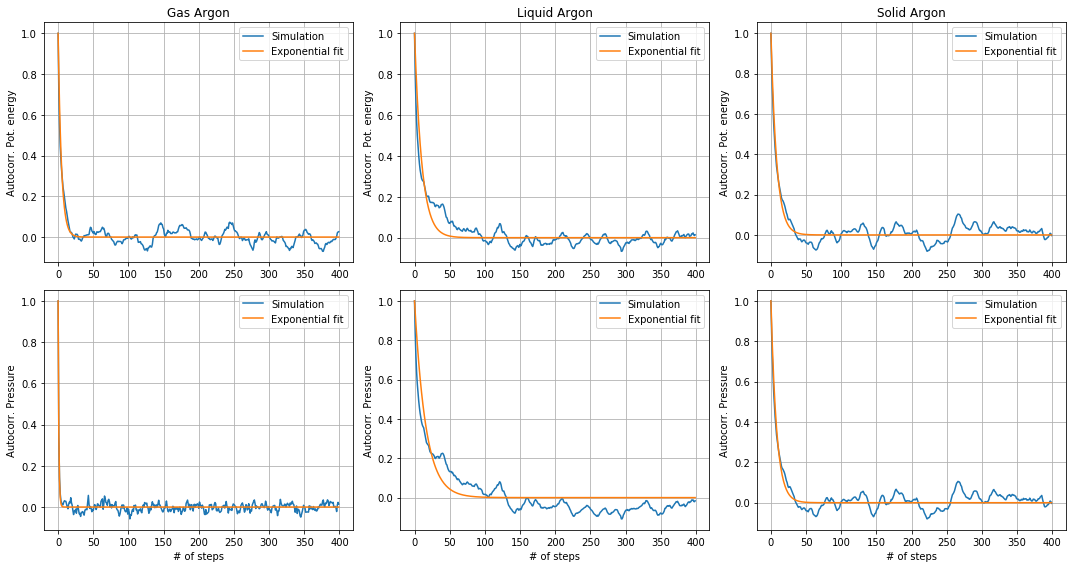

In [85]:
#Autocorrelation functions with an exponential fit
fit_tau = np.ones((2,3))
fit_err = np.ones((2,3))
x = np.arange(len(gas_ep))

files = [[gas_ep, liq_ep, sol_ep,], [gas_pr, liq_pr, sol_pr]]
titles = ["Gas Argon", "Liquid Argon", "Solid Argon"]
obs = ["Autocorr. Pot. energy", "Autocorr. Pressure"]
fig, ax = plt.subplots(2,3, figsize=(15,8))
for i in range(len(obs)):
    for j in range(len(titles)):
        fit_tau[i,j], fit_err[i,j] = curve_fit(exp_ac, x, files[i][j] ) 
        
        ax[i,j].plot(files[i][j], label='Simulation')
        ax[i,j].plot(x, exp_ac(x, fit_tau[i,j]), label='Exponential fit')
        ax[i,j].set_ylabel(obs[i])
        ax[0,j].set_title(titles[j])
        ax[1,j].set_xlabel("# of steps")
        ax[i,j].grid(True)
        ax[i,j].legend()
        print("Phase: "+titles[j]+" , observable: "+obs[i])
        print("Tau = {:.2f} ± {:.2f}".format(fit_tau[i,j], fit_err[i,j]))
fig.tight_layout()

From the exponential fit we can assume that the autocorrelation is negligible after $3\cdot tau$:
- Gas phase: 15 steps;
- Liquid phase: 50 steps;
- Solid phase: 25 steps;

- **Statistical uncertainties as a function of $L$:**

In [295]:
files = [gas_epot, liq_pres, sol_epot, gas_pres, liq_epot, sol_pres]
titles = ["Gas Argon", "Liquid Argon", "Solid Argon"]
obs = ["Uncertainties pot. energy", "Uncertainties pressure"]

M = 5*10**5
L = np.arange(10, 5*10**3, 10)
errors = np.zeros((len(files), len(L)))
for sample in range(len(files)):
    for i in L:
        N  = int(M/i)
        mean = np.zeros(N)
        for j in range(N):
            mean[j] = np.mean(files[sample][i*j:(j+1)*i])
        _ , err_mean = prog_sums(N, mean, mean**2)
        errors[sample, np.where(L==i)] = err_mean[-1]

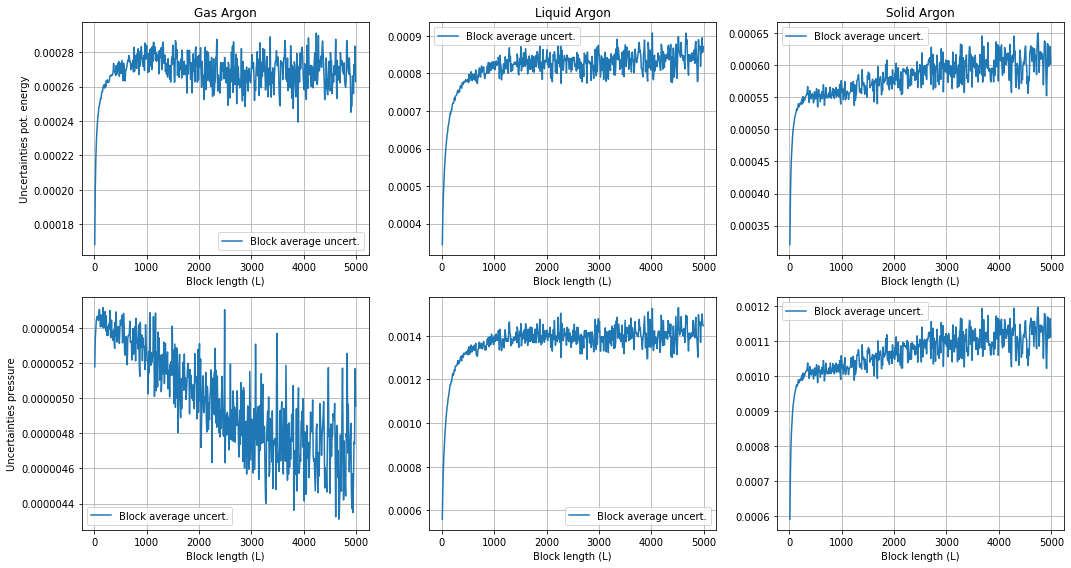

In [296]:
fig, axes = plt.subplots(2,3, figsize=(15,8))
for i in range(len(files)):
    axes[i%2,i%3].plot(L, errors[i, :], label='Block average uncert.')
    axes[i%2,0].set_ylabel(obs[i%2])
    axes[i%2,i%3].set_xlabel("Block length (L)")
    axes[0,i%3].set_title(titles[i%3])
    axes[i%2,i%3].grid(True)
    axes[i%2,i%3].legend()
fig.tight_layout()

For small block lengths the uncertainties increase due to the fact that blocks are still correlated. After this period, They stabilize around the value of the true standard deviation of the mean. Finally, for large block length there are more fluctuations due to the fact that the number of blocks became small.

### Exercise 07.2

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the Monte Carlo NVT code</span> we have provided: average value of $g(r)$ in each block (with output in the file: output.gofr.0), final average value of $g(r)$ with statistical uncertainties (with output in the file: output.gave.0).

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, inside the previously used Molecular Dynamics code</span>.

### Exercise 07.4

By means of your upgraded MC code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

In [84]:
np.loadtxt?

In [269]:
rad  = np.loadtxt("MonteCarlo_NVT/outputs/NVE/solid/ave_gofr.out", unpack=True, usecols=([2*i for i in range(100)]), max_rows=1)

gas_pr = np.loadtxt("MonteCarlo_NVT/outputs/NVT/gas/output.pres.0", usecols=(2))
err_gas_pr = np.loadtxt("MonteCarlo_NVT/outputs/NVT/gas/output.pres.0", usecols=(3))

gas_ep = np.loadtxt("MonteCarlo_NVT/outputs/NVT/gas/output.epot.0", usecols=(2))
err_gas_ep = np.loadtxt("MonteCarlo_NVT/outputs/NVT/gas/output.epot.0", usecols=(3))

gas_gr = [np.loadtxt("MonteCarlo_NVT/outputs/NVE/gas/ave_gofr.out", unpack=True, usecols=([2*i for i in range(100)]), skiprows=1), np.loadtxt("MonteCarlo_NVT/outputs/NVT/gas/output.gave.0", unpack=True, usecols=([2*i for i in range(100)]), skiprows=1)]
err_gas_gr = [np.loadtxt("MonteCarlo_NVT/outputs/NVE/gas/ave_gofr.out", unpack=True, usecols=([2*i+1 for i in range(100)]), skiprows=1), np.loadtxt("MonteCarlo_NVT/outputs/NVT/gas/output.gave.0", unpack=True, usecols=([2*i+1 for i in range(100)]), skiprows=1)]
gas_gr = np.array(gas_gr[:])[:,:,-1]
err_gas_gr = np.array(err_gas_gr[:])[:,:,-1]

liq_pr = np.loadtxt("MonteCarlo_NVT/outputs/NVT/liquid/output.pres.0", usecols=(2))
err_liq_pr = np.loadtxt("MonteCarlo_NVT/outputs/NVT/liquid/output.pres.0", usecols=(3))

liq_ep = np.loadtxt("MonteCarlo_NVT/outputs/NVT/liquid/output.epot.0", usecols=(2))
err_liq_ep = np.loadtxt("MonteCarlo_NVT/outputs/NVT/liquid/output.epot.0", usecols=(3))

liq_gr = [np.loadtxt("MonteCarlo_NVT/outputs/NVE/liquid/ave_gofr.out", unpack=True, usecols=([2*i for i in range(100)]), skiprows=1), np.loadtxt("MonteCarlo_NVT/outputs/NVT/liquid/output.gave.0", unpack=True, usecols=([2*i for i in range(100)]), skiprows=1)]
err_liq_gr = [np.loadtxt("MonteCarlo_NVT/outputs/NVE/liquid/ave_gofr.out", unpack=True, usecols=([2*i+1 for i in range(100)]), skiprows=1), np.loadtxt("MonteCarlo_NVT/outputs/NVT/liquid/output.gave.0", unpack=True, usecols=([2*i+1 for i in range(100)]), skiprows=1)]
liq_gr = np.array(liq_gr[:])[:,:,-1]
err_liq_gr = np.array(err_liq_gr[:])[:,:,-1]

sol_pr = np.loadtxt("MonteCarlo_NVT/outputs/NVT/solid/output.pres.0", usecols=(2))
err_sol_pr = np.loadtxt("MonteCarlo_NVT/outputs/NVT/solid/output.pres.0", usecols=(3))

sol_ep = np.loadtxt("MonteCarlo_NVT/outputs/NVT/solid/output.epot.0", usecols=(2))
err_sol_ep = np.loadtxt("MonteCarlo_NVT/outputs/NVT/solid/output.epot.0", usecols=(3))

sol_gr = [np.loadtxt("MonteCarlo_NVT/outputs/NVE/solid/ave_gofr.out", unpack=True, usecols=([2*i for i in range(100)]), skiprows=1), np.loadtxt("MonteCarlo_NVT/outputs/NVT/solid/output.gave.0", unpack=True, usecols=([2*i for i in range(100)]), skiprows=1)]
err_sol_gr = [np.loadtxt("MonteCarlo_NVT/outputs/NVE/solid/ave_gofr.out", unpack=True, usecols=([2*i+1 for i in range(100)]), skiprows=1), np.loadtxt("MonteCarlo_NVT/outputs/NVT/solid/output.gave.0", unpack=True, usecols=([2*i+1 for i in range(100)]), skiprows=1)]
sol_gr = np.array(sol_gr[:])[:,:,-1]
err_sol_gr = np.array(err_sol_gr[:])[:,:,-1]

In SI units: (using eV instead of J)

- $T = T^* $120K 
- $\rho = \rho^* \cdot \sigma^3/m$ = $\rho^*$/$\frac{0.34^3}{39.948*1.66}$kg/m^3 = $\rho^* / 5.93 \cdot 10^{-4}$kg/m^3
- $\epsilon = k_B\cdot $120 K = 1.654$\cdot 10^{-21}$ J = 1.032 meV
- $P = P^* \cdot \epsilon /\sigma^3$ = $P^* \cdot 1.654/0.34^3 \cdot 10^{6} Pa$ = $4.21 \cdot 10^{6}$Pa

In [270]:
# (almost) SI units
gas_ep *= 1.032
err_gas_ep *= 1.032
liq_ep *= 1.032
err_liq_ep *= 1.032
sol_ep *= 1.032
err_sol_ep *= 1.032

gas_pr *= 4.21*10**3
err_gas_pr *= 4.21*10**3
liq_pr *= 4.21*10**3
err_liq_pr *= 4.21*10**3
sol_pr *= 4.21*10**3
err_sol_pr *= 4.21*10**3

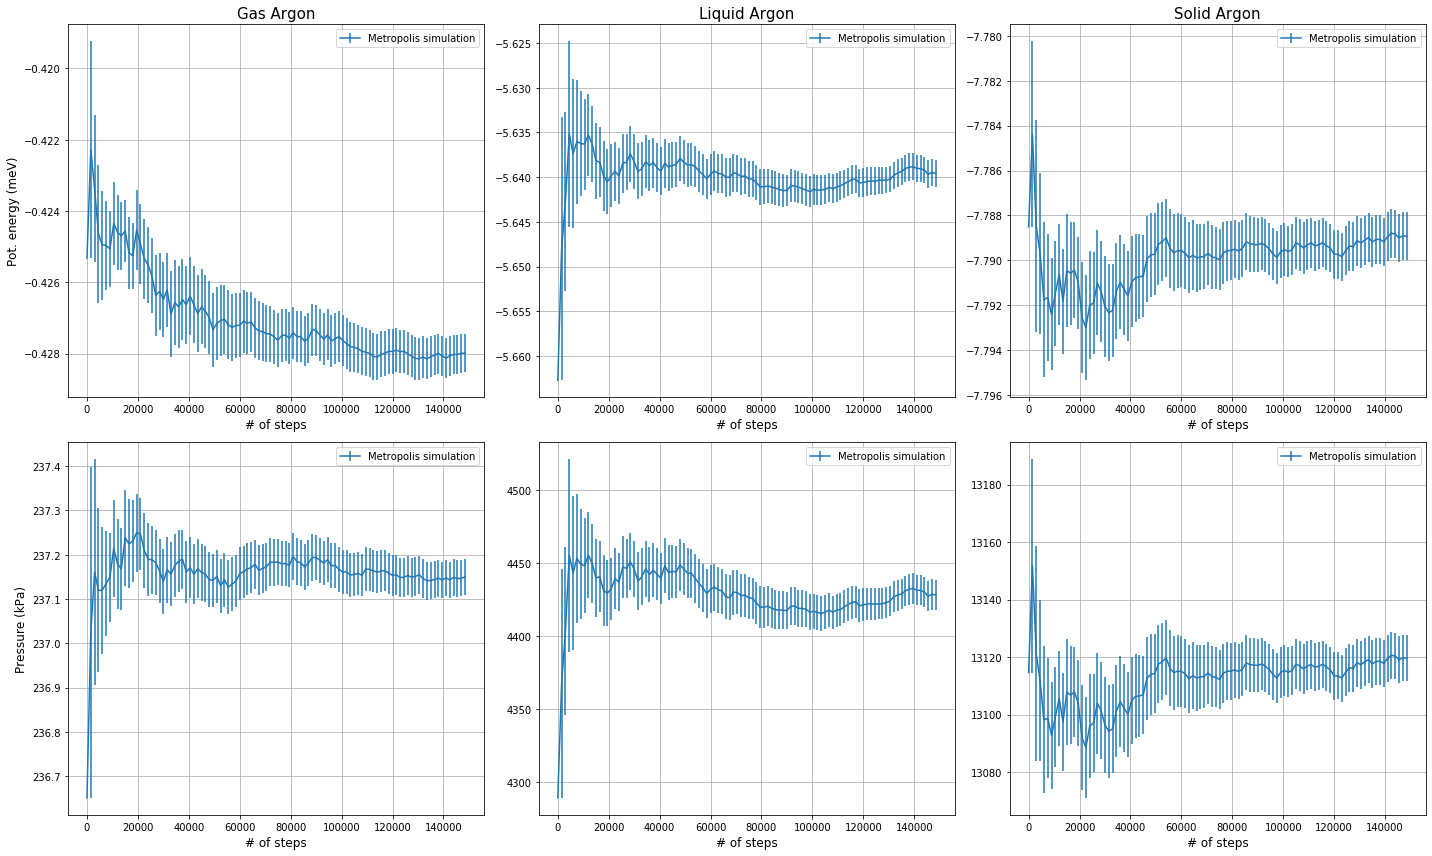

In [271]:
files = [gas_ep, liq_pr, sol_ep, gas_pr, liq_ep, sol_pr]
errs = [err_gas_ep, err_liq_pr, err_sol_ep, err_gas_pr, err_liq_ep, err_sol_pr]
titles = ["Gas Argon", "Liquid Argon", "Solid Argon"]
obs = ["Pot. energy (meV)", "Pressure (kPa)"]
x = np.arange(100)
x *= 1500

fig, axes = plt.subplots(2,3, figsize=(20,12))
for i in range(len(files)):
    axes[i%2,i%3].errorbar(x, files[i], yerr=errs[i], label='Metropolis simulation')
    axes[i%2,0].set_ylabel(obs[i%2], fontsize=12)
    axes[i%2,i%3].set_xlabel("# of steps", fontsize=12)
    axes[0,i%3].set_title(titles[i%3], fontsize=15)
    axes[i%2,i%3].grid(True)
    axes[i%2,i%3].legend()
fig.tight_layout()

In [244]:
# error propagation for ratio plot
def prop_err(x,y, err_x, err_y):
    f = x/y
    if all(f==1):
        return 0
    err = np.sqrt((err_x/y)**2 + (f*err_y/y)**2)
    return err

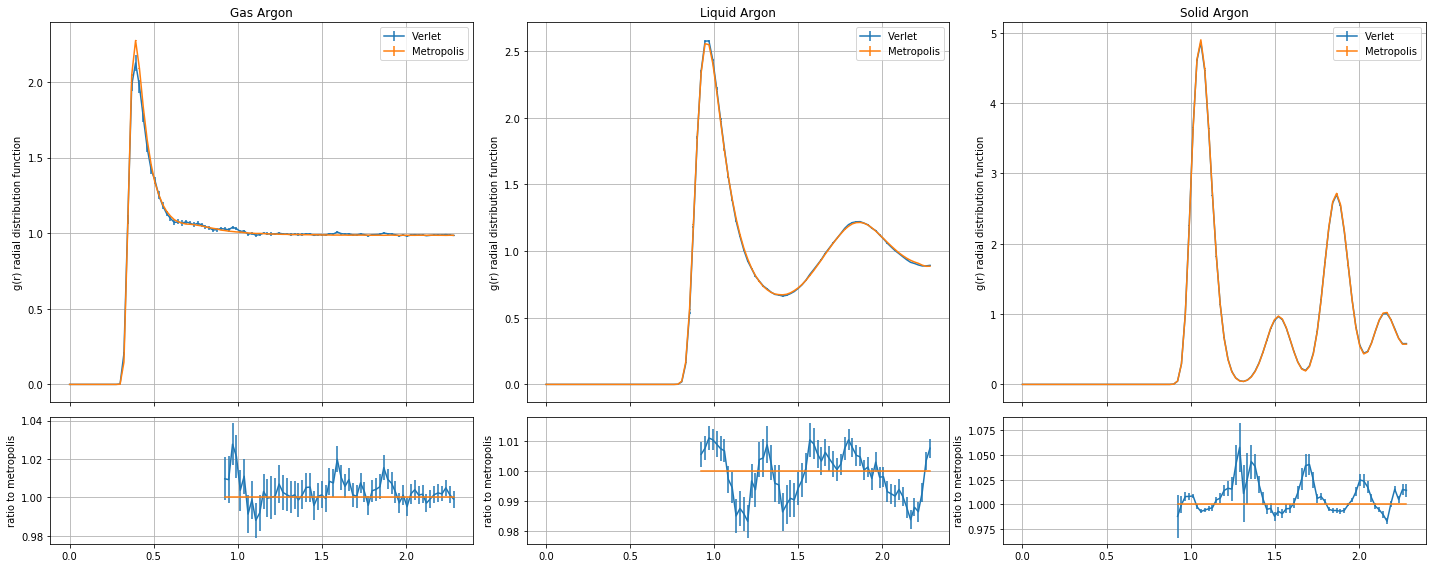

In [245]:
grs = [gas_gr, liq_gr, sol_gr]
err_grs = [err_gas_gr, err_liq_gr, err_sol_gr]
tit_gr = ['Verlet', 'Metropolis']

fig, axs = plt.subplots(2,3, figsize=(20,8), gridspec_kw={'height_ratios': [3,1]}, sharex=True)
for i in range(len(tit_gr)):
    for j in range(len(grs)):
        axs[0,j].errorbar(rad, grs[j][i], yerr=err_grs[j][i], label=tit_gr[i])
        axs[1,j].errorbar(rad[40:], grs[j][i][40:]/grs[j][1][40:], yerr=prop_err(grs[j][i][40:], grs[j][1][40:], err_grs[j][i][40:], err_grs[j][1][40:]))
        axs[0,j].set_ylabel("g(r) radial distribution function")
        axs[1,j].set_ylabel('ratio to metropolis')
        axs[0,j].set_title(titles[j])
        axs[i,j].grid(True)
        axs[0,j].legend()
fig.tight_layout()

g(r) obtained from Verlet and Metropolis algorithm are compatible within 1 sigma for the gas phase, while in the liquid and solid phase are compatible within 3 sigma in most bins.